# Exploratory Data Analysis - Multiclass Classification

# 1. Data and Package Import

In [1]:
import pandas as pd 
import numpy as np
import skimpy as skim
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import os 

import warnings 
warnings.filterwarnings("ignore")

import functions as ft
import importlib

In [75]:
importlib.reload(ft)

<module 'functions' from '/Users/ezequielhurtado/Desktop/PROJETS/M2/multiclass-classification/scripts/functions.py'>

In [2]:
df_train = pd.read_csv("../data/train.csv", delimiter = ",",header = 0)
df_test = pd.read_csv("../data/test.csv")

# 2. Database description and first visualizations. 

In [3]:
df_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1055.0,NaN,19724.0,F,NaN,NaN,NaN,N,1.3,NaN,3.64,NaN,NaN,NaN,NaN,209.0,10.5,3.0,C
1,1,3282.0,Placebo,17884.0,F,N,Y,Y,N,0.7,309.0,3.60,96.0,1142.0,71.3,106.0,240.0,12.4,4.0,C
2,2,1653.0,NaN,20600.0,F,NaN,NaN,NaN,N,2.2,NaN,3.64,NaN,NaN,NaN,NaN,139.0,9.5,2.0,C
3,3,999.0,D-penicillamine,22514.0,F,N,Y,N,N,1.0,498.0,3.35,89.0,1601.0,164.3,85.0,394.0,9.7,3.0,C
4,4,2202.0,NaN,17897.0,F,NaN,NaN,NaN,N,17.2,NaN,3.15,NaN,NaN,NaN,NaN,432.0,11.2,3.0,C


In [4]:
df_train.shape

(15000, 20)

In [5]:
df_train.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,15000.000000,6669.000000,15000.000000,8452.000000,8558.000000,8555.000000,6630.000000,14414.000000,14974.000000,15000.000000
mean,7499.500000,1966.998733,19248.502373,1.861462,327.670115,3.525314,74.715689,1667.605282,106.579545,110.297097,253.822027,10.627748,3.025667
std,4330.271354,1355.897299,3697.546749,2.752375,179.801705,0.369981,74.211915,1861.746315,56.493338,49.676146,94.074989,0.741888,0.877796
min,0.000000,3.000000,133.300000,0.300000,120.000000,1.800000,4.000000,16.000000,8.000000,33.000000,0.400000,7.100000,1.000000
25%,3749.750000,1092.000000,16374.000000,0.600000,242.000000,3.290000,31.000000,721.000000,71.000000,80.000000,183.000000,10.100000,2.000000
50%,7499.500000,1785.000000,19544.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,251.000000,10.600000,3.000000
75%,11249.250000,2635.000000,22369.000000,1.800000,360.000000,3.770000,86.000000,1691.250000,133.300000,133.000000,312.000000,11.000000,4.000000
max,14999.000000,40795.000000,35472.000000,28.000000,1790.000000,4.640000,588.000000,19270.000000,2148.000000,598.000000,724.000000,18.000000,4.000000


In [6]:
df_train.dtypes

id                 int64
N_Days           float64
Drug              object
Age              float64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [7]:
df_train.nunique().reset_index().rename(columns={'index':'Champ',0:'Nb_Distinct_Values'})\
    .sort_values('Nb_Distinct_Values',ascending=False)

,Champ,Nb_Distinct_Values
0,id,15000
1,N_Days,543
13,Alk_Phos,387
3,Age,375
16,Platelets,267
10,Cholesterol,210
14,SGOT,201
12,Copper,170
11,Albumin,165
15,Tryglicerides,153


In [8]:
# Missing Values
df_train.isna().sum()/len(df_train)*100

id                0.000000
N_Days            0.000000
Drug             42.906667
Age               0.000000
Sex               0.000000
Ascites          42.913333
Hepatomegaly     42.906667
Spiders          42.966667
Edema             0.000000
Bilirubin         0.000000
Cholesterol      55.540000
Albumin           0.000000
Copper           43.653333
Alk_Phos         42.946667
SGOT             42.966667
Tryglicerides    55.800000
Platelets         3.906667
Prothrombin       0.173333
Stage             0.000000
Status            0.000000
dtype: float64

In [9]:
# Missing Values per individual. This means that over 6K patients have more than
# 9 missing values on their variables. 
pd.DataFrame( df_train.isna().sum(axis = 1), columns = ['nb_na']).groupby(['nb_na']).value_counts()

nb_na
0     6338
1      331
2     1809
3       73
4        2
5        3
7        3
8       34
9     6053
10     353
11       1
Name: count, dtype: int64

In [10]:
df_train.isna()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14998,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False,False


In [11]:
skim.skim(df_train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 15000  │ │ float64     │ 12    │                                                          │
│ │ Number of columns │ 20     │ │ string      │ 7     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA   ┃ NA %              ┃ mean  ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ id            │    0 │                 0 │  7500 │   4330 │     0 │  3750 │  7500 │ 11250 │ 15000 │ ██████ │  │
│ │ N_Days        │    0 │                 0 │  1967 │   1356 │     3 │  1092 │  1785 │  2635 │ 40800 │   █    │  │
│ │ Age           │    0 │                 0 │ 19250 │   3698 │ 133.3 │ 16370 │ 19540 │ 22370 │ 35470 │   ▅█▁  │  │
│ │ Bilirubin     │    0 │                 0 │ 1.861 │  2.752 │   0.3 │   0.6 │   0.9 │   1.8 │    28 │   █    │  │
│ │ Cholesterol   │ 8331 │             55.54 │ 327.7 │  179.8 │   120 │   242 │   280 │   360 │  1790 │   █▂   │  │
│ │ Albumin       │    0 │                 0 │ 3.525 │   0.37 │   1.8 │  3.29 │  3.58 │  3.77 │  4.64 │   ▃█▅▁ │  │
│ │ Copper        │ 6548 │ 43.65333333333333 │ 74.72 │  74.21 │     4 │    31 │    52 │    86 │   588 │  █▁▁   │  │
│ │               │      │                 6 │       │        │       │       │       │       │       │        │  │
│ │ Alk_Phos      │ 6442 │ 42.94666666666666 │  1668 │   1862 │    16 │   721 │  1072 │  1691 │ 19270 │   █    │  │
│ │               │      │                 5 │       │        │       │       │       │       │       │        │  │
│ │ SGOT          │ 6445 │ 42.96666666666667 │ 106.6 │  56.49 │     8 │    71 │ 97.65 │ 133.3 │  2148 │   █    │  │
│ │ Tryglicerides │ 8370 │              55.8 │ 110.3 │  49.68 │    33 │    80 │    99 │   133 │   598 │   █▃   │  │
│ │ Platelets     │  586 │ 3.906666666666666 │ 253.8 │  94.07 │   0.4 │   183 │   251 │   312 │   724 │  ▁▇█▂  │  │
│ │               │      │                 7 │       │        │       │       │       │       │       │        │  │
│ │ Prothrombin   │   26 │ 0.173333333333333 │ 10.63 │ 0.7419 │   7.1 │  10.1 │  10.6 │    11 │    18 │   █▅   │  │
│ │               │      │                34 │       │        │       │       │       │       │       │        │  │
│ │ Stage         │    0 │                 0 │ 3.026 │ 0.8778 │     1 │     2 │     3 │     4 │     4 │ ▁ ▅ █▇ │  │
│ └───────────────┴──────┴───────────────────┴───────┴────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃           ┃      ┃           ┃          ┃          ┃           ┃         ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column    ┃ NA   ┃ NA %      ┃ shortest ┃ longest  ┃

**Variables definition**
* ID : Identification of each of the patients.
* N_days : Days since first diagnostic or tratment.
* Drug : Taken treatment. It can be either none, a placebo treatment or a real\
treatment. 
* Age : Age of the patient.
* Sex : Gender of the patient. 
* Ascites : Presence of this element in the body (liquids in the abdomen) with\
possible responses being Yes, No or NA.
* Hepatomegaly : Presence of Hepatomegaly (Liver volume augmentation) with\
possible responses being Yes, No or NA.
* Spiders : Presence of Spider Angioma (Skin vascular injuries) with possible\
responses being Yes, No or NA.
* Edema : Presence of un œdema (skin inflamation due to liquid retention).\
We can have categories such as None, Slight, or Marked.
* Bilirubin : Level of bilirubin in the blood (mg/dL). This marks the liver\
functions. Normal if between 0,3 mg/dL and 1,9 mg/dL. 
* Cholesterol : Level of cholesterol in the blood (mg/dL). Indicator of  global\
health status or methabolic problems. Normal if below 200mg/dL.
* Albumim : Level of Albumim in the blood (g/dL). Nutrition indicator and liver\
function. Normal if between 3,5 and 5 g/dL.
* Copper : Concentration level of copper in blood or urine (µg/dL). Indicator\
of a Wilson Disease or a methabolic disorder. Normal when levels are between\
70 and 150 µg/dL. 
* Alk_Phos : Level of Alkaline phosphatase (UI/L). An indicator of liver function\
or (osseuse).
* SGOT : Transaminase enzyme level (SGOT or AST) (in IU/L), an indicator of\
damage to the liver or other organs.
* Tryglicerides : Level of tryglicerides in blood (mg/dL). Indicator of metabolism\
and lipid. Normal if levels are below 150 mg/dL. 
* Platelets : Number of platelets in blood (thousands/μL). A coagulation indicator.  
* Prothrombin : Prothrombin time (in seconds or % activity), a coagulation test\
to assess liver function.  
* Stage : Status of the disease based on a classification system (1 to 4). 4\
being the highest level. 
* **Status** : Target variable - Current status of the patient (Alive, Deceased or\
Alive with a transplant).

**Insights**
- Some variables seem to have a similar value of missing values. For example,\
tryglicerides and cholesterol or other variables around 0,43. This will need\
a further analysis in the following section.


# 3. Exploratory Data Analysis

In [12]:
skim.skim(df_train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 15000  │ │ float64     │ 12    │                                                          │
│ │ Number of columns │ 20     │ │ string      │ 7     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA   ┃ NA %              ┃ mean  ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ id            │    0 │                 0 │  7500 │   4330 │     0 │  3750 │  7500 │ 11250 │ 15000 │ ██████ │  │
│ │ N_Days        │    0 │                 0 │  1967 │   1356 │     3 │  1092 │  1785 │  2635 │ 40800 │   █    │  │
│ │ Age           │    0 │                 0 │ 19250 │   3698 │ 133.3 │ 16370 │ 19540 │ 22370 │ 35470 │   ▅█▁  │  │
│ │ Bilirubin     │    0 │                 0 │ 1.861 │  2.752 │   0.3 │   0.6 │   0.9 │   1.8 │    28 │   █    │  │
│ │ Cholesterol   │ 8331 │             55.54 │ 327.7 │  179.8 │   120 │   242 │   280 │   360 │  1790 │   █▂   │  │
│ │ Albumin       │    0 │                 0 │ 3.525 │   0.37 │   1.8 │  3.29 │  3.58 │  3.77 │  4.64 │   ▃█▅▁ │  │
│ │ Copper        │ 6548 │ 43.65333333333333 │ 74.72 │  74.21 │     4 │    31 │    52 │    86 │   588 │  █▁▁   │  │
│ │               │      │                 6 │       │        │       │       │       │       │       │        │  │
│ │ Alk_Phos      │ 6442 │ 42.94666666666666 │  1668 │   1862 │    16 │   721 │  1072 │  1691 │ 19270 │   █    │  │
│ │               │      │                 5 │       │        │       │       │       │       │       │        │  │
│ │ SGOT          │ 6445 │ 42.96666666666667 │ 106.6 │  56.49 │     8 │    71 │ 97.65 │ 133.3 │  2148 │   █    │  │
│ │ Tryglicerides │ 8370 │              55.8 │ 110.3 │  49.68 │    33 │    80 │    99 │   133 │   598 │   █▃   │  │
│ │ Platelets     │  586 │ 3.906666666666666 │ 253.8 │  94.07 │   0.4 │   183 │   251 │   312 │   724 │  ▁▇█▂  │  │
│ │               │      │                 7 │       │        │       │       │       │       │       │        │  │
│ │ Prothrombin   │   26 │ 0.173333333333333 │ 10.63 │ 0.7419 │   7.1 │  10.1 │  10.6 │    11 │    18 │   █▅   │  │
│ │               │      │                34 │       │        │       │       │       │       │       │        │  │
│ │ Stage         │    0 │                 0 │ 3.026 │ 0.8778 │     1 │     2 │     3 │     4 │     4 │ ▁ ▅ █▇ │  │
│ └───────────────┴──────┴───────────────────┴───────┴────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃           ┃      ┃           ┃          ┃          ┃           ┃         ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column    ┃ NA   ┃ NA %      ┃ shortest ┃ longest  ┃

- Here we can see that some variables does not contain any null value. Others,\
seem to have a similar quantity of null values. Either on categorical or quant-\
itative variables. First of all, we will do an analysis. Then we will treat\
missing values.

## 3.1. Univariate Analysis

In [13]:
quant_col = df_train.select_dtypes(exclude = 'object').columns
quali_col  = df_train.select_dtypes(include  = 'object').columns

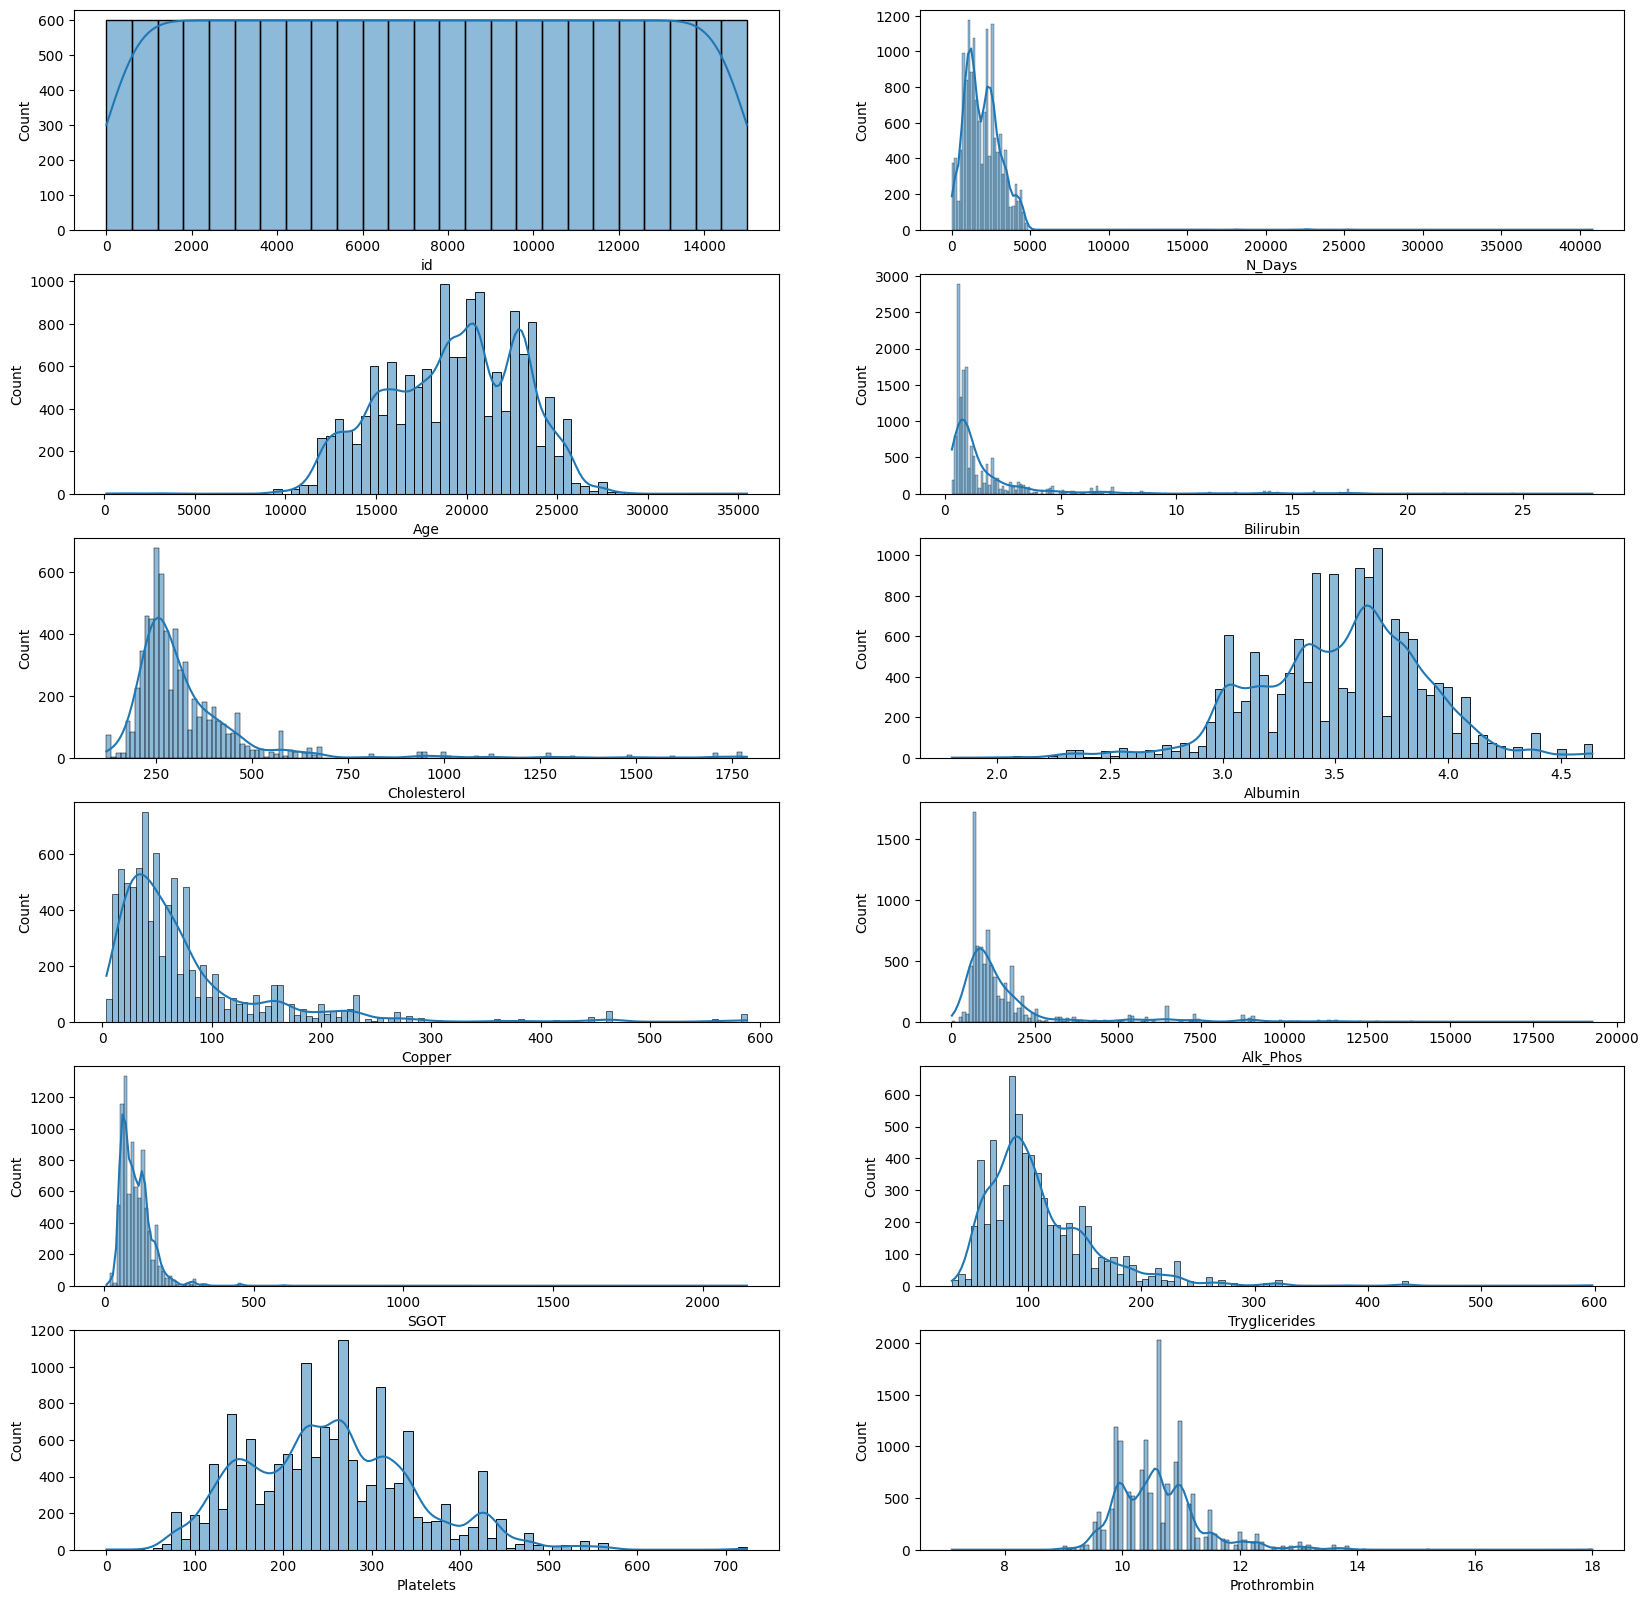

In [14]:
fig, ax = plt.subplots(6,2, figsize = (20,20))
for i, subplots in zip(quant_col, ax.flatten()) :
    sns.histplot(df_train[i], ax = subplots ,palette= 'pastel', kde = True)
fig.show()

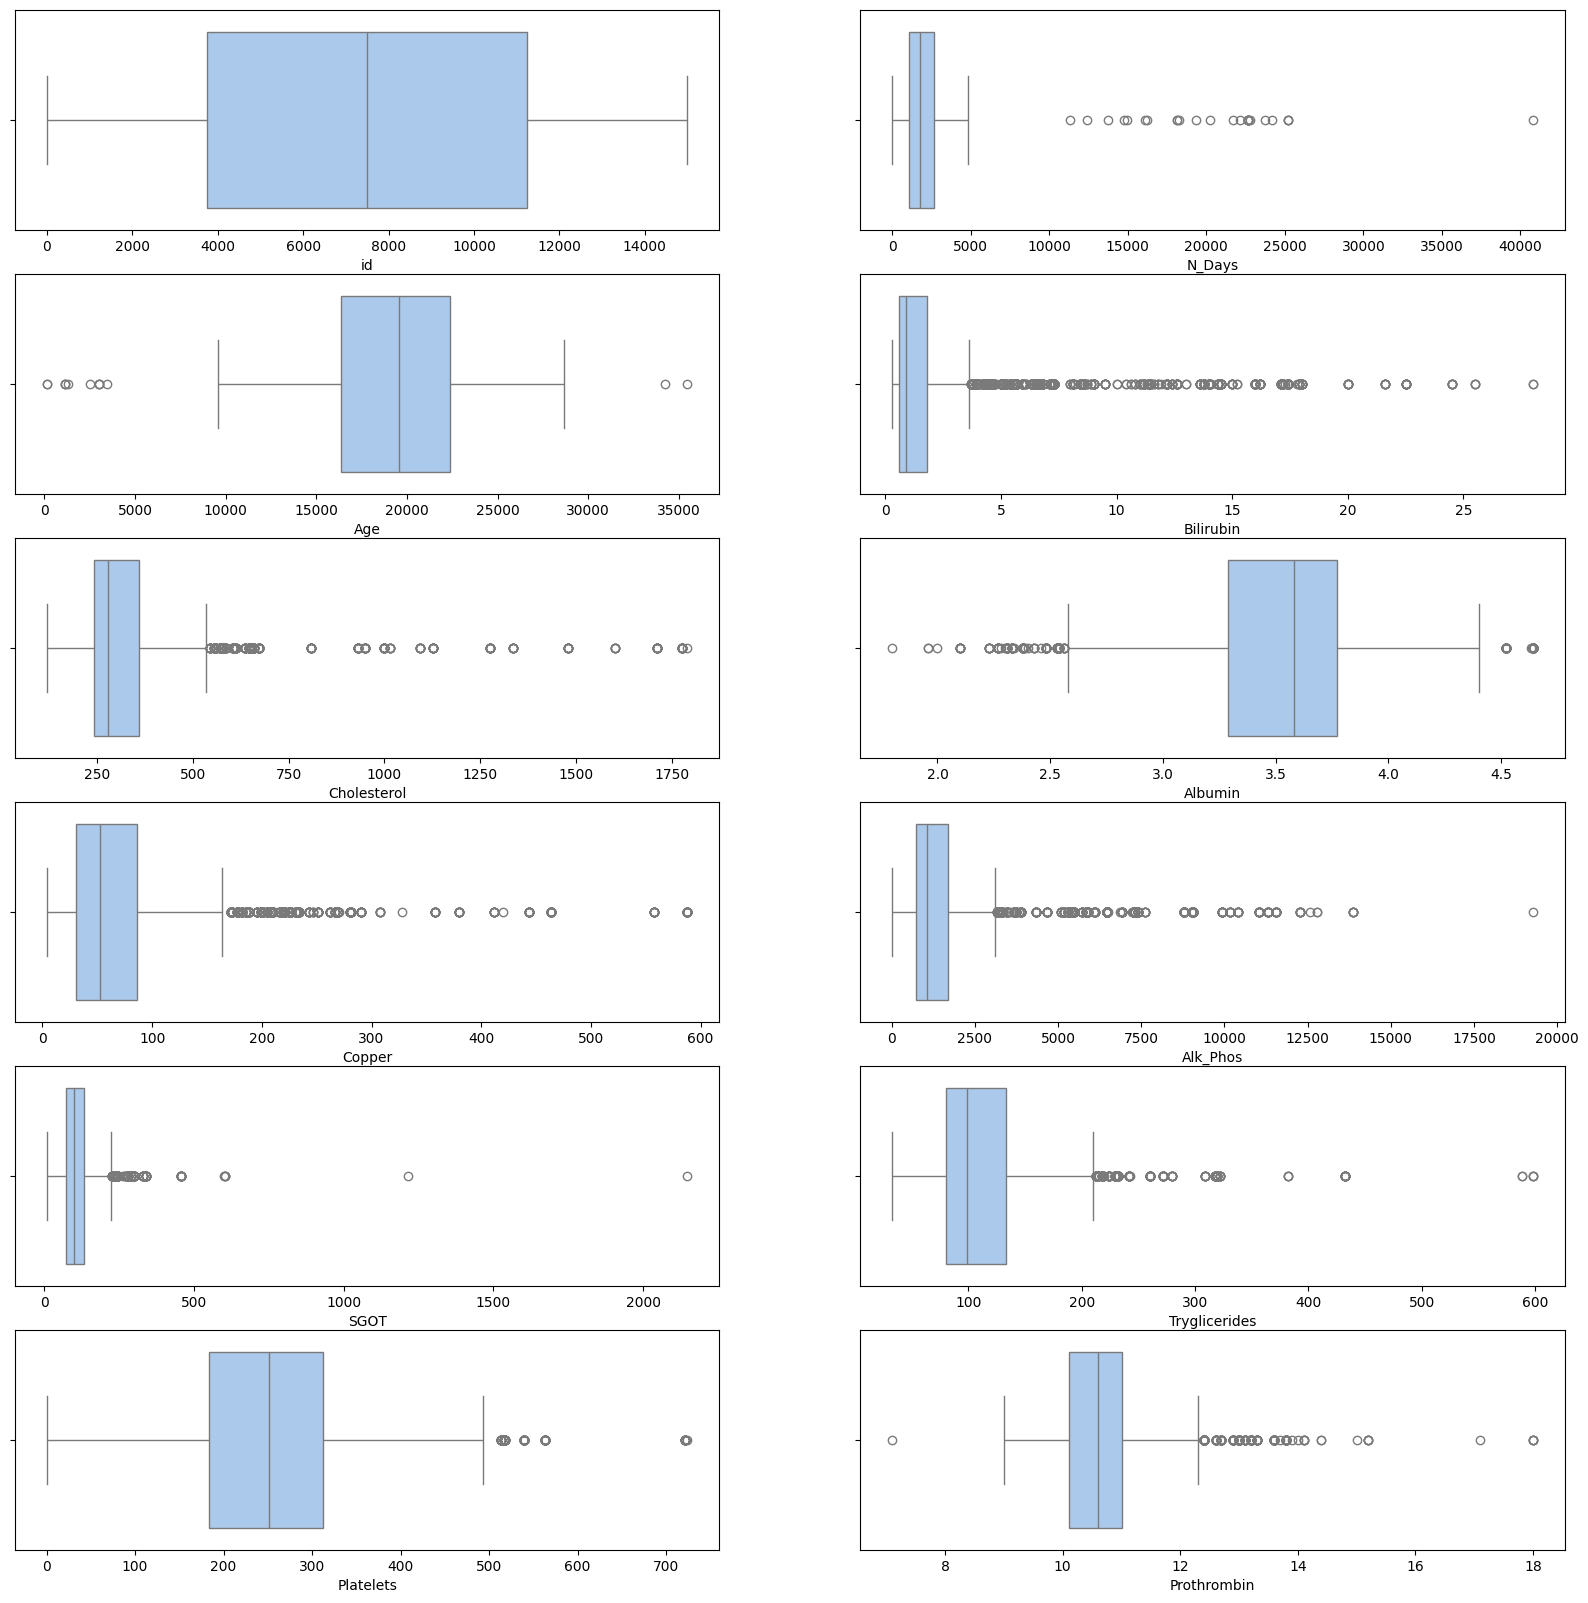

In [15]:
fig, ax = plt.subplots(6,2, figsize = (20,20))
for i, subplots in zip(quant_col, ax.flatten()) :
    sns.boxplot(df_train, x = i, ax = subplots ,palette= 'pastel')
fig.show()

- Variables such as 'N_days','Bilirubin', 'Alk_Phos', 'SGOT' and others seem to be\
**concentrated on the left**. They also have some important values at their right.\
In the case of 'N_Days', it means that most og the patients treatments took\
betweeen 0 to 5000 days. In the medical terms it may mean that values at the\
right may mean some unstable or not healthy scores. 
- Variables such as 'Albumim' or 'Age' seem to be more **normaly distributed**. This\
means for 'Age' that most of the patients are concentrated on 50000 days old.\
We have not the eldest population or the youngest. 

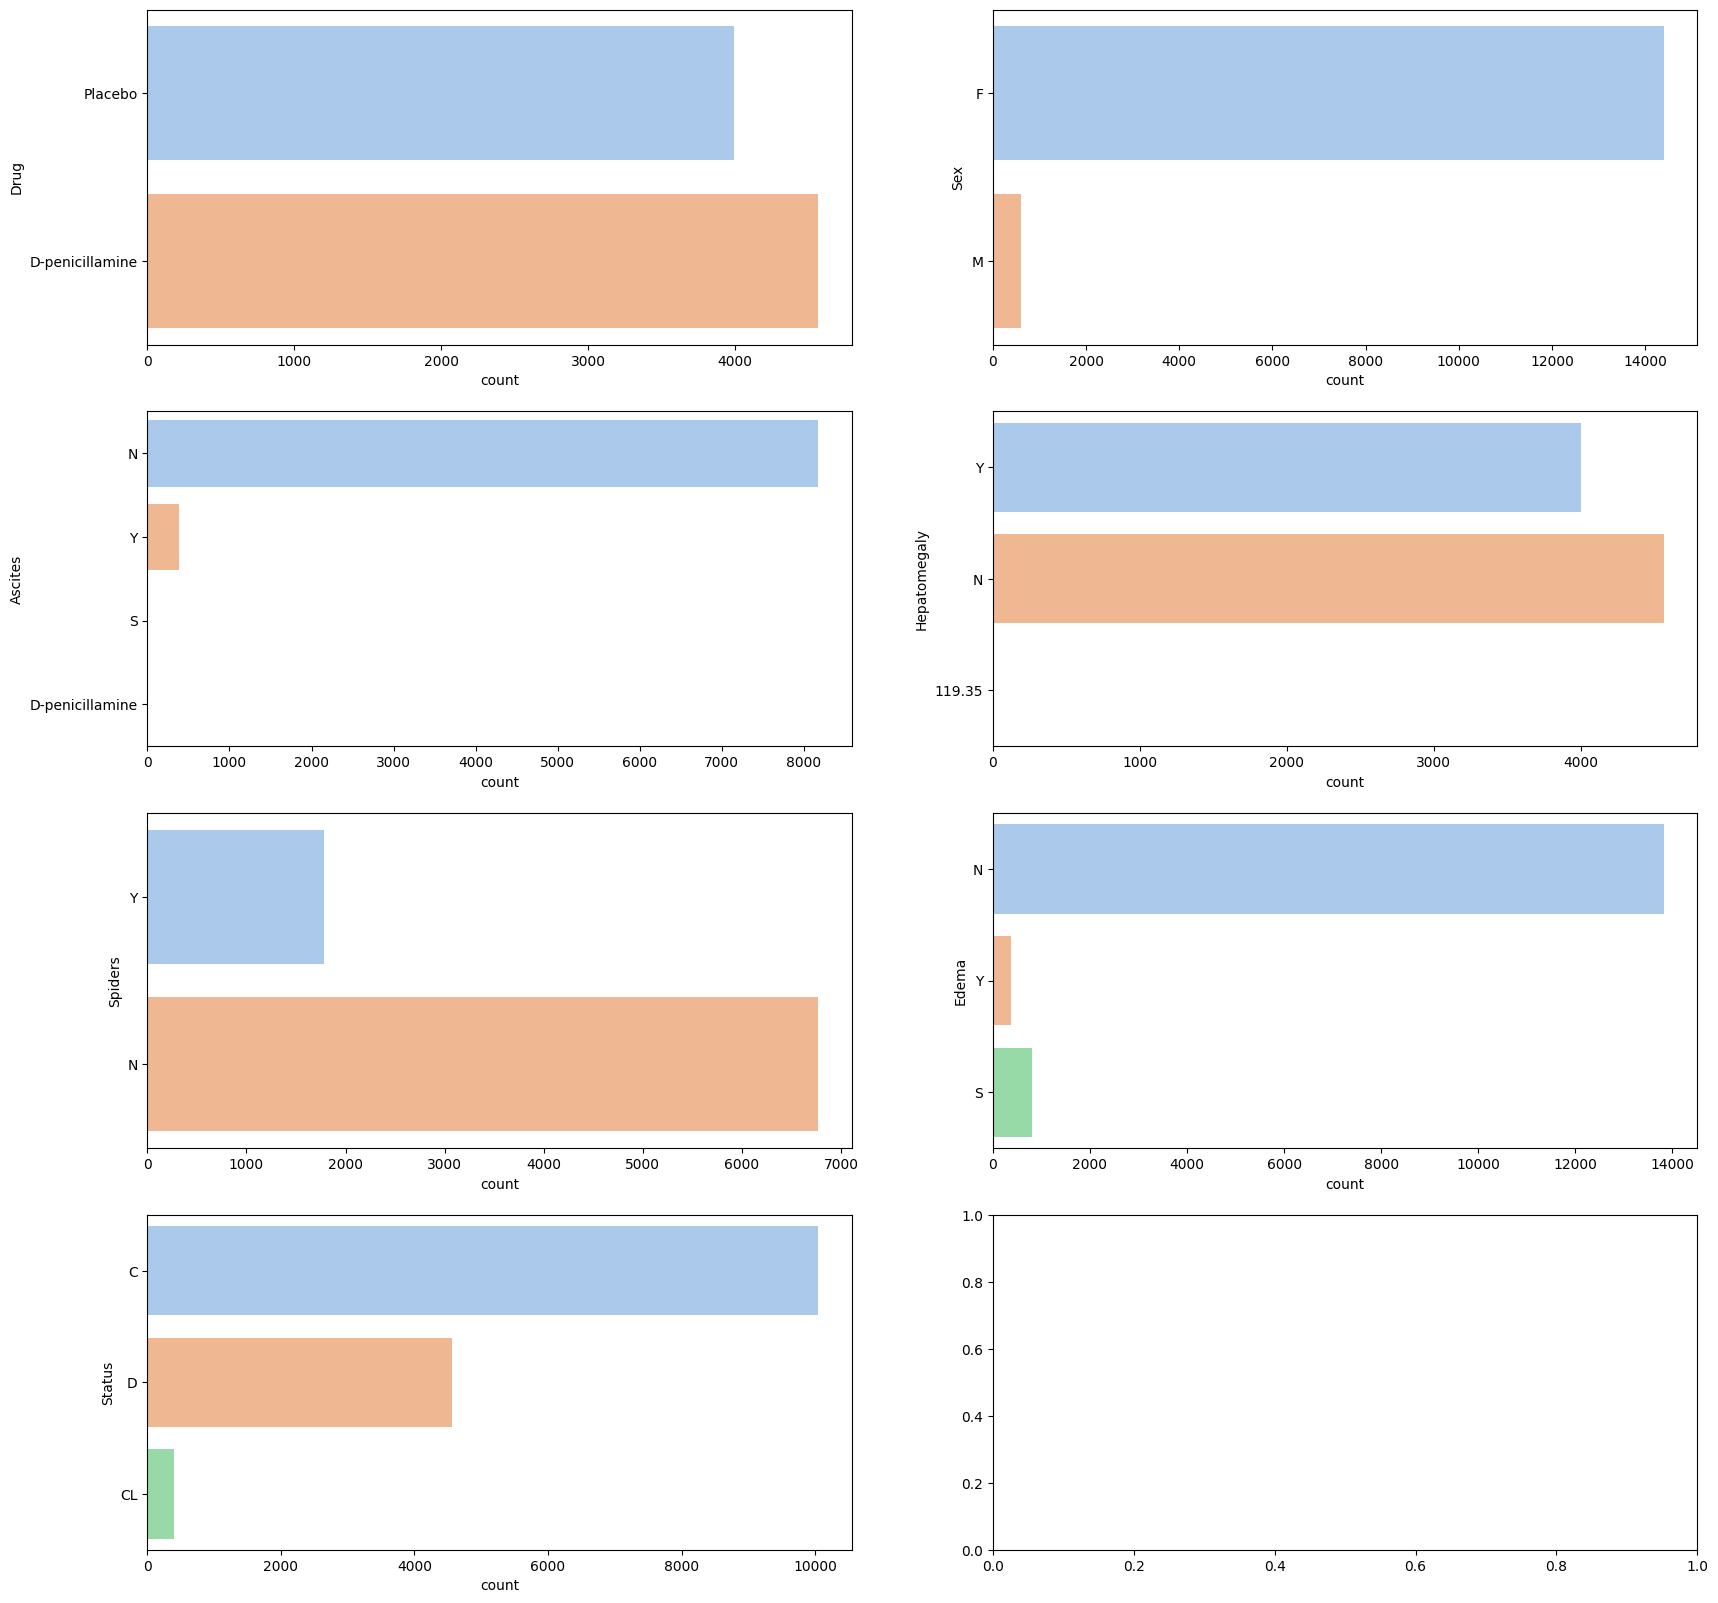

In [16]:
fig, ax = plt.subplots(4,2, figsize = (20,20))
for i, subplots in zip(quali_col, ax.flatten()) :
    sns.countplot(df_train[i], ax = subplots ,palette= 'pastel')
fig.show()

- In variables having null values and being near an uniform distribution, I will proceed\
by creating and 'Unknown' modality. When the distribution is not even, the mode\
wll be imputed in Null values.
- For variables having poorly frequent modalities, we will transform them into\
null values and replace this observations following the precedent statement. 

## 3.2. Bivariate Analysis

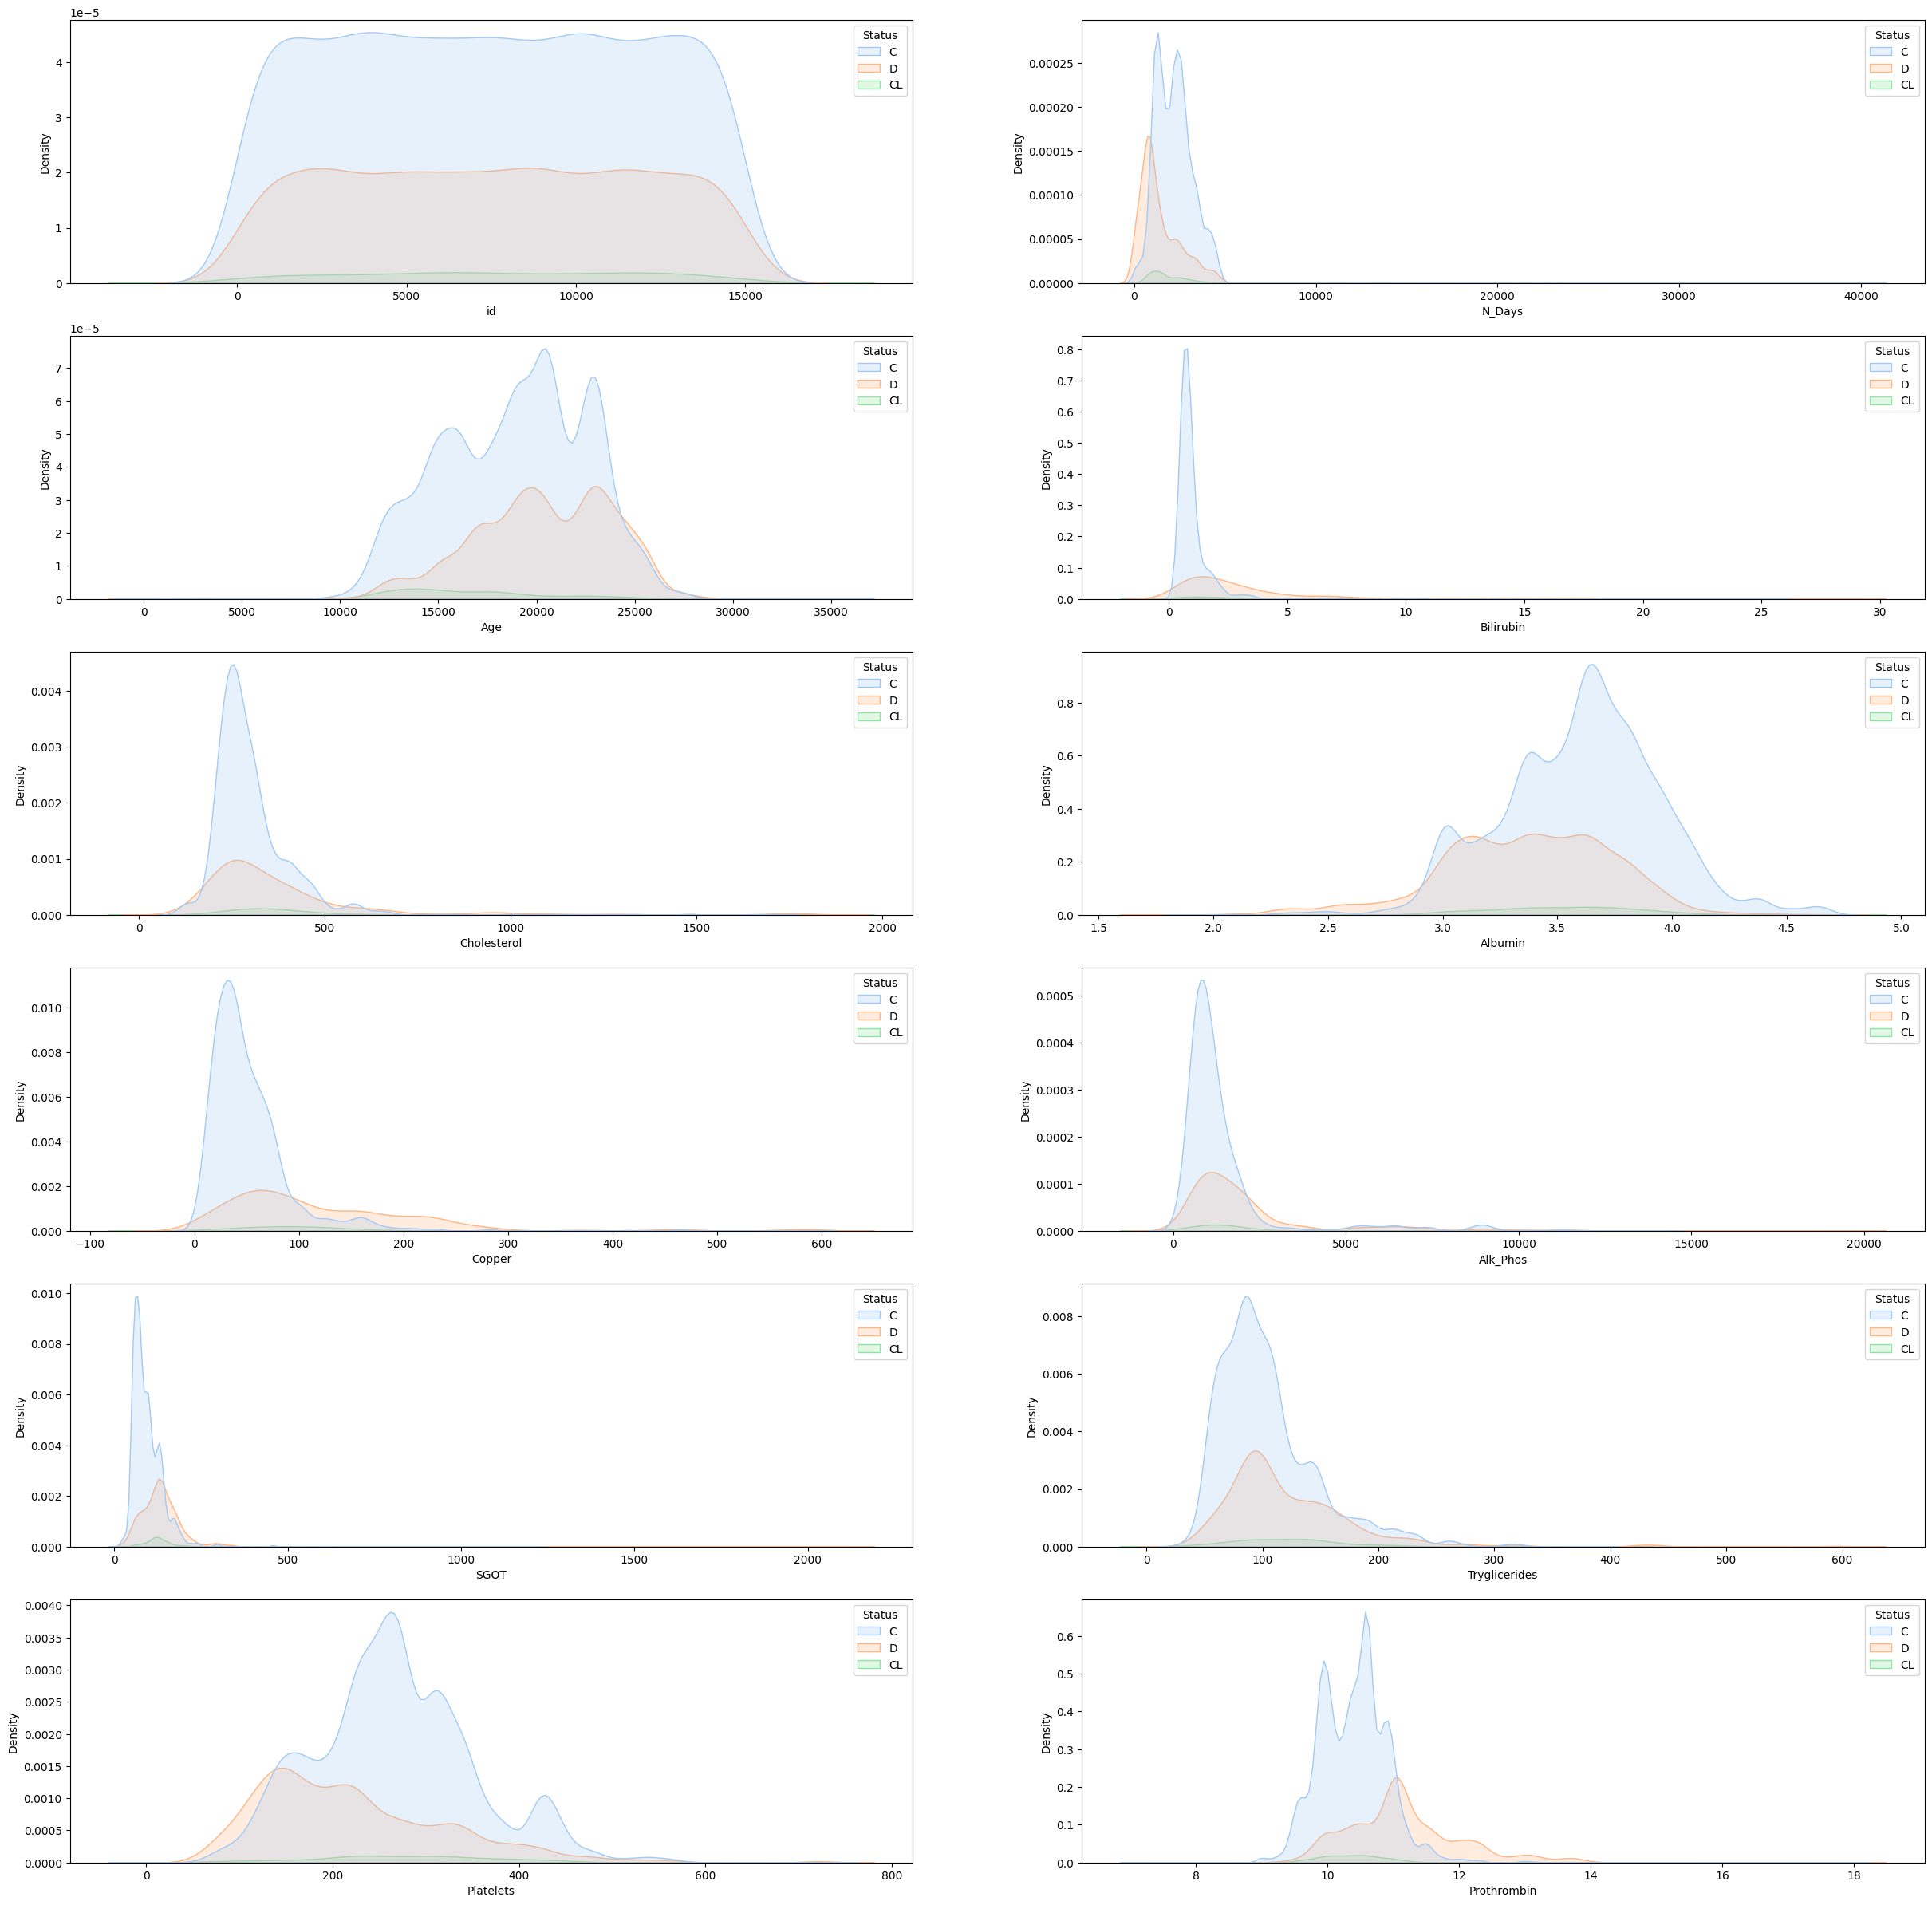

In [17]:
fig, ax = plt.subplots(6,2, figsize = (30,30))
for i, subplots in zip(quant_col, ax.flatten()) :
    sns.kdeplot(df_train, x = i, hue = 'Status', ax = subplots,
                palette= 'pastel',
                common_norm = True, fill = True)
fig.show()

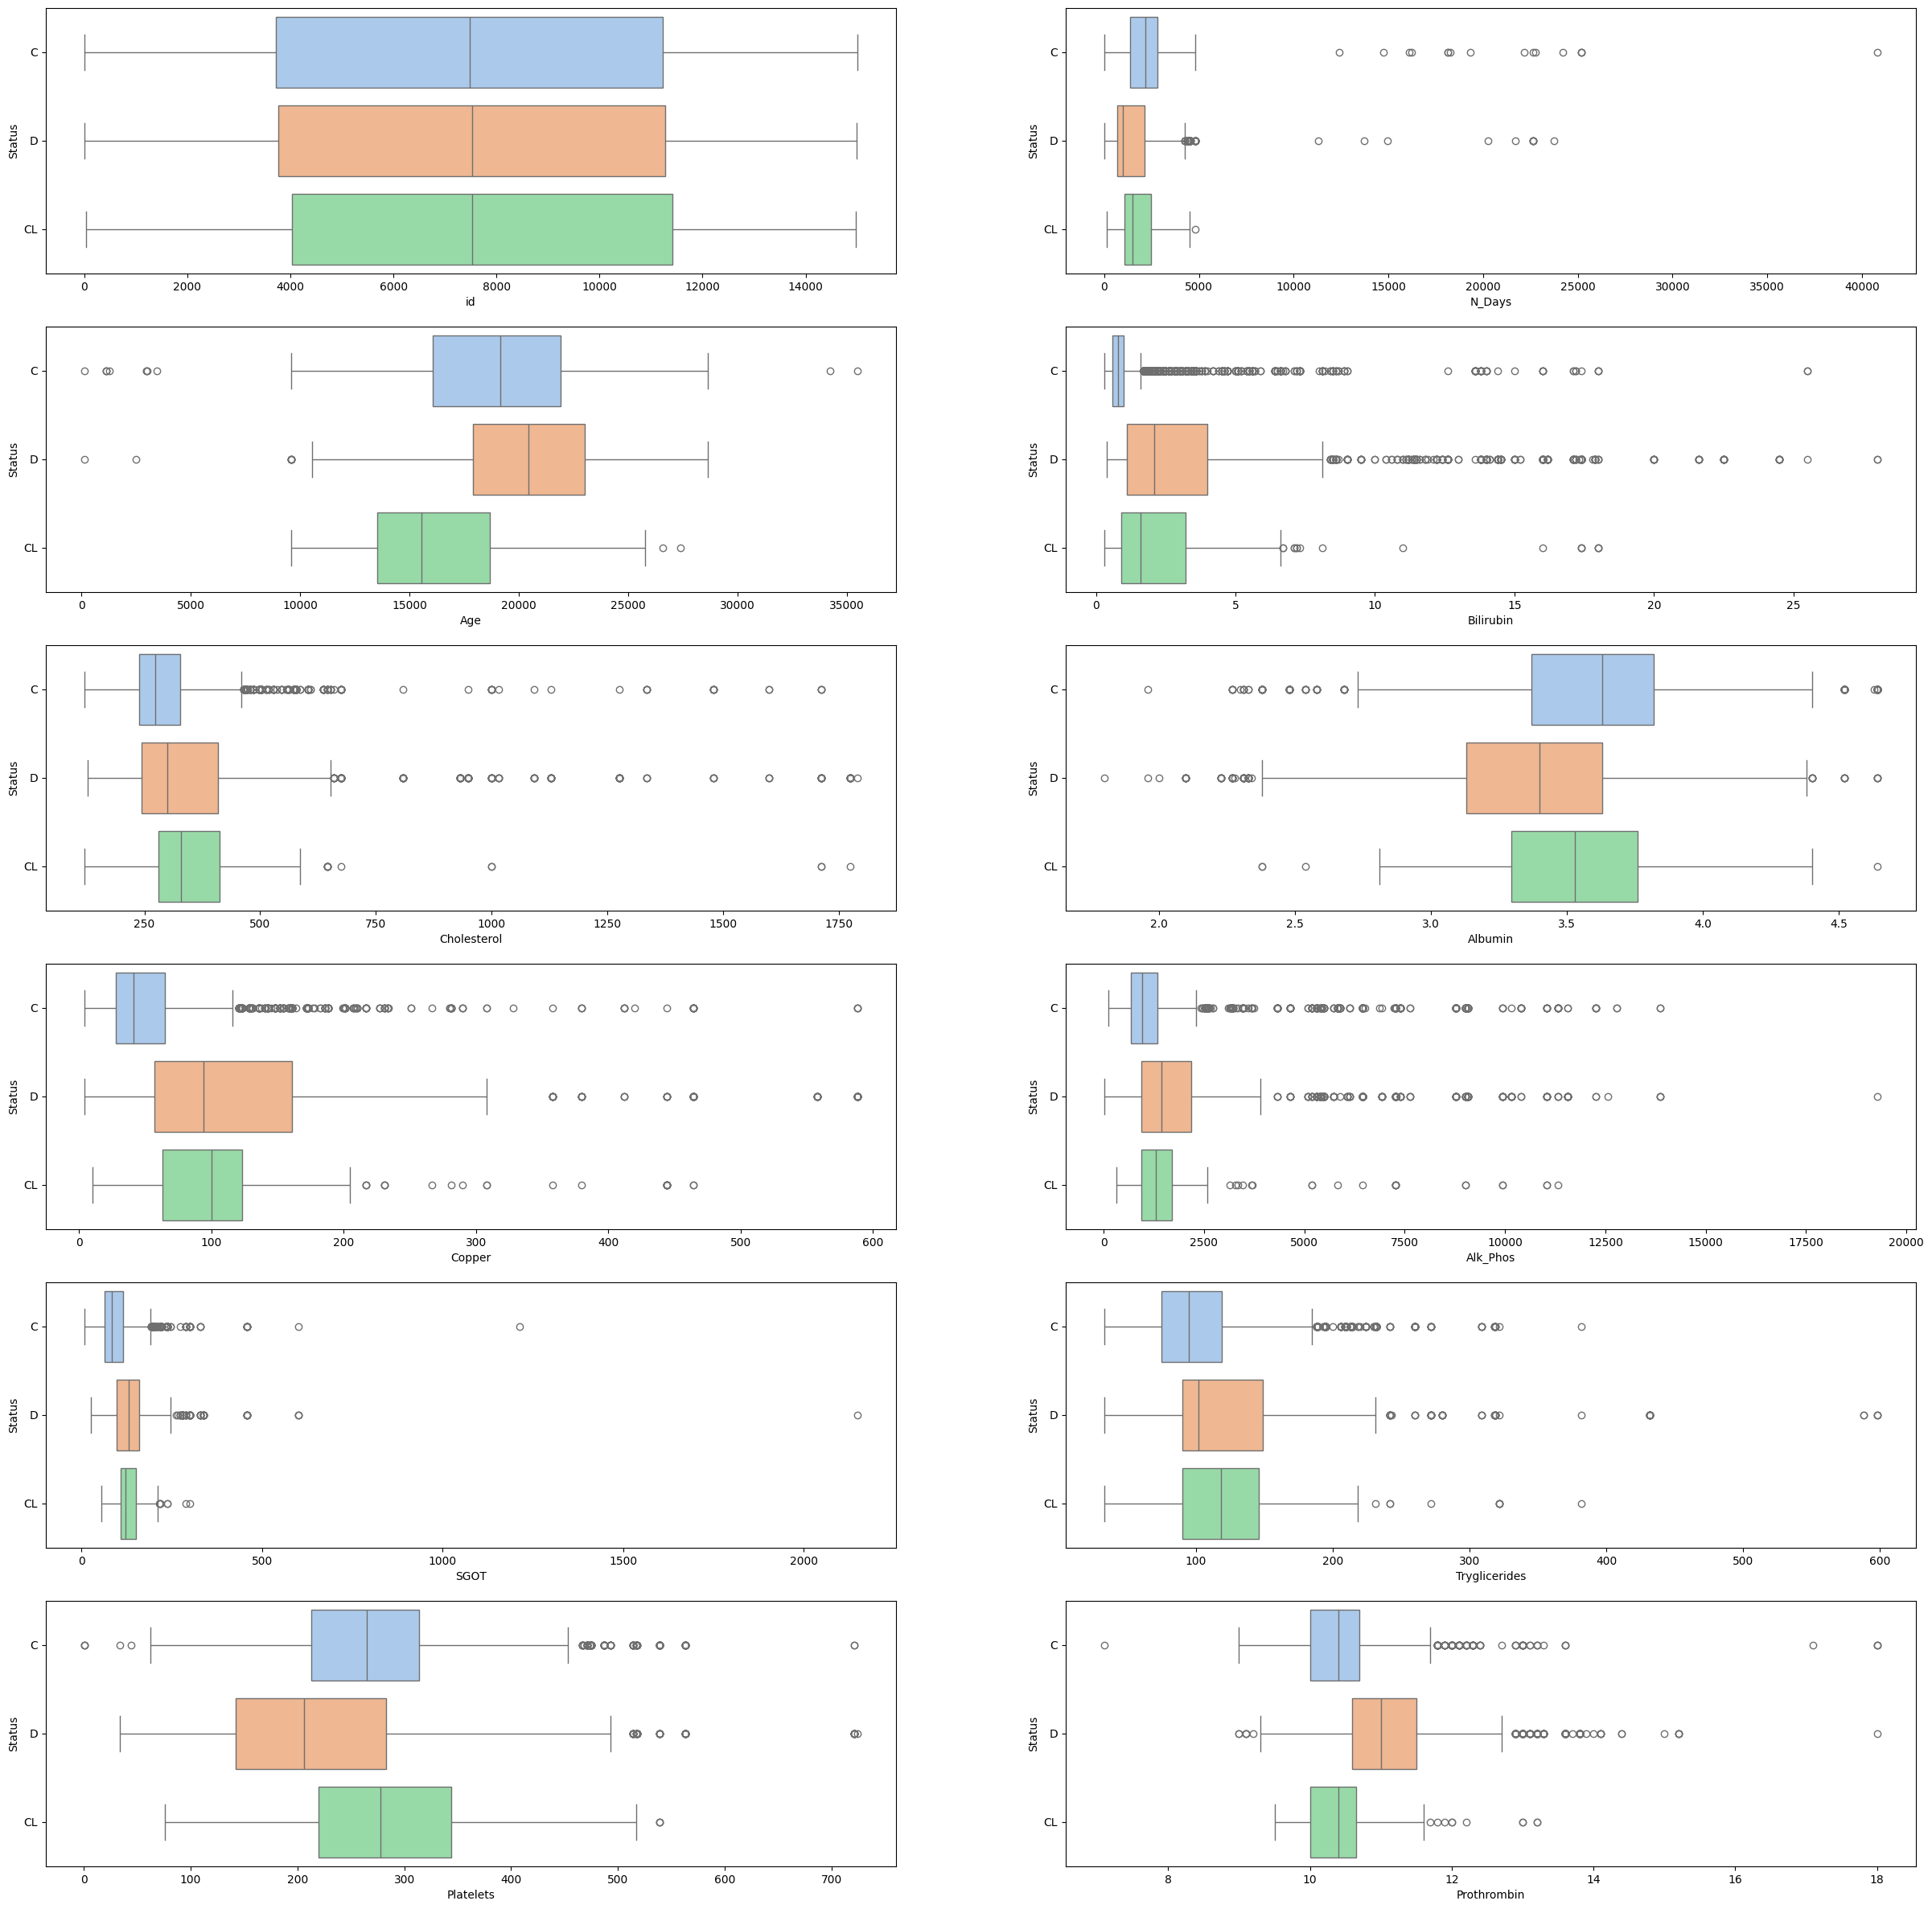

In [18]:
fig, ax = plt.subplots(6,2, figsize = (30,30))
for i, subplots in zip(quant_col, ax.flatten()) :
    sns.boxplot(df_train, x = i, y = 'Status', ax = subplots ,palette= 'pastel')
fig.show()

- Variables seem to have more extreme values when it concerns the population on\
'D' or 'CL' groups.
- As 'D' or 'CL' are already extreme values, their distributions shows that they\
are more compact compared to the 'C' group. 

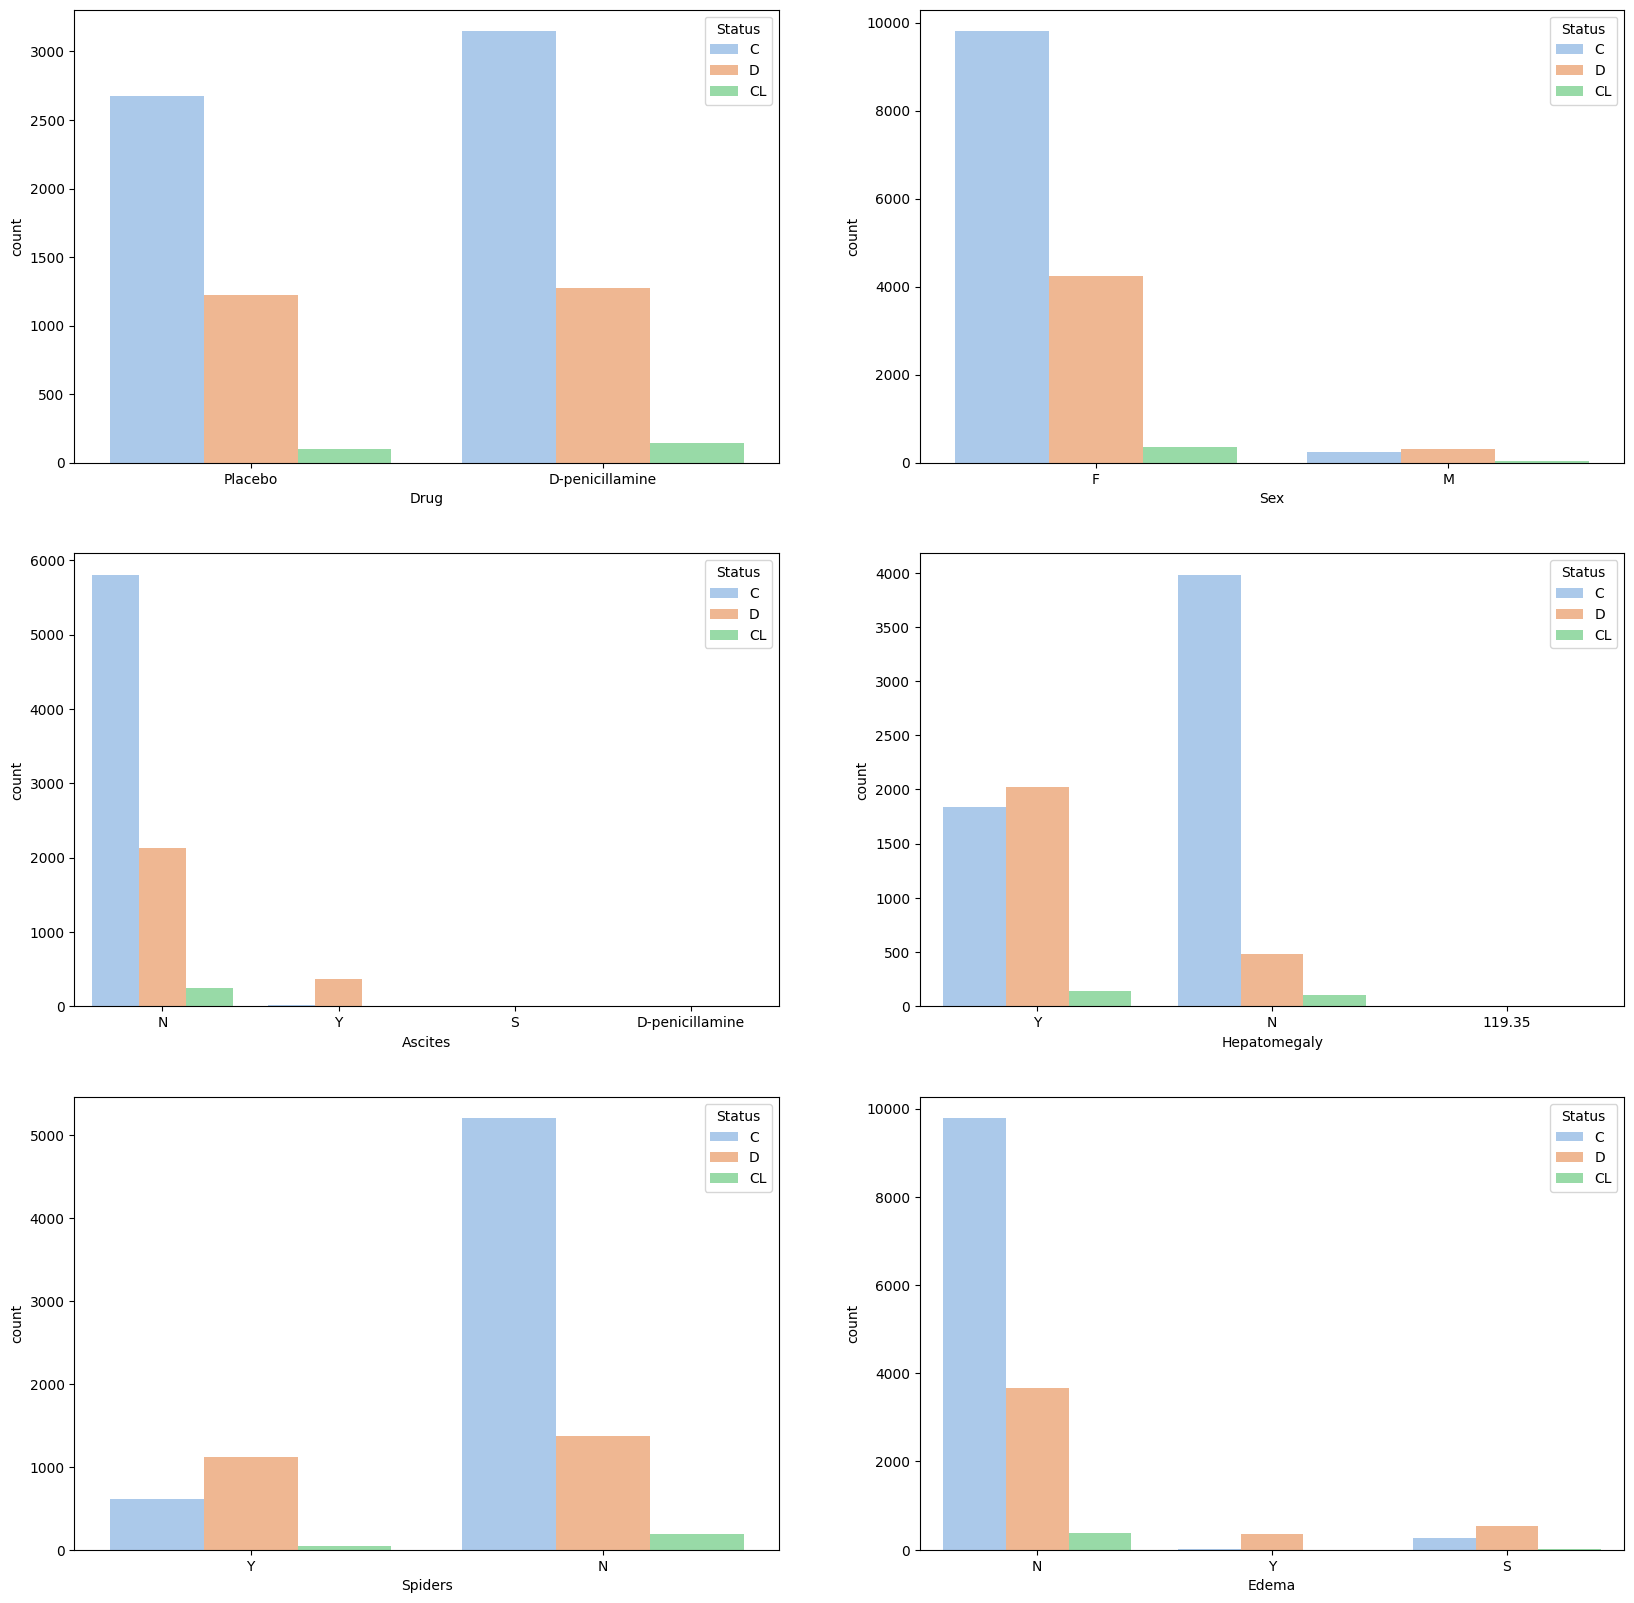

In [19]:
fig, ax = plt.subplots(3,2, figsize = (20,20))
for i, subplots in zip(quali_col[:-1], ax.flatten()) :
    sns.countplot(df_train, x = i, hue = 'Status', ax = subplots ,palette= 'pastel')
fig.show()

- Some distributions are similar when we see them from the target variable\
perspective. One example can be 'Age'. Others seem to change. For example, Edemas\ 
were seen only on the D group. But not all the members of this group.'Ascites'\
variable show a similar case.

## 3.3. Multivariate Analysis

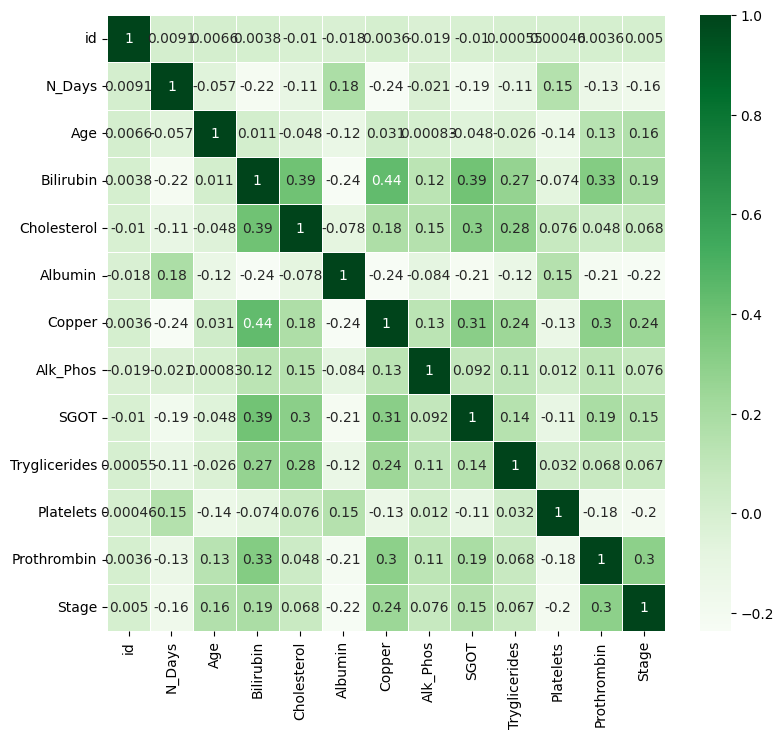

In [20]:
plt.figure(figsize = (9,8))
sns.heatmap(df_train[quant_col].corr(), annot = True, linewidth=.5, cmap = 'Greens')
plt.show()

- Correlations seem to be weak. Indeed, most of the correlation scores are between\
-0,2 and 0,2. We will consider them to be significant if values are over 0,3. This\
being said, we have the relation between **Copper & Bilirubin**, **Cholesterol & Bilirubin**\
or **Bilirubin & Prothrombin**. 

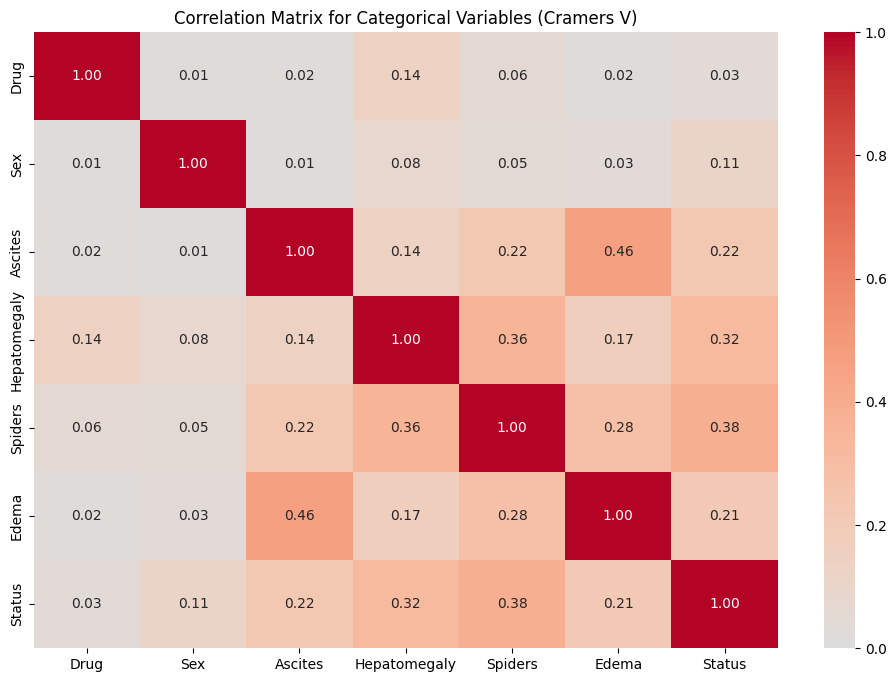

In [21]:
ft.cat_corr_matrix(df_train)

## 3.4. Statistical Tests

In [22]:
cat_var = df_train.select_dtypes(include = 'object')[:-1]
for i in cat_var: 
    contingency_table = (pd.crosstab(df_train[i], df_train['Status']))
    chi2_stat, p_val, dof, expected = ss.chi2_contingency(contingency_table)

    print(f"Variable : {i}")
    print(f"Chi2 Statistic: {chi2_stat}")
    print(f"P_Value : {p_val}")
    print("\n")

Variable : Drug
Chi2 Statistic: 10.398610569958167
P_Value : 0.0055203981924629286


Variable : Sex
Chi2 Statistic: 187.76010370560022
P_Value : 1.6920434828805052e-41


Variable : Ascites
Chi2 Statistic: 864.0614837503647
P_Value : 2.205172508116189e-183


Variable : Hepatomegaly
Chi2 Statistic: 1723.61358666475
P_Value : 0.0


Variable : Spiders
Chi2 Statistic: 1261.8005479313981
P_Value : 1.008073934491804e-274


Variable : Edema
Chi2 Statistic: 1337.2522922055573
P_Value : 2.7873191207540522e-288


Variable : Status
Chi2 Statistic: 30000.000000000004
P_Value : 0.0




In [23]:
quant_var = df_train.select_dtypes(exclude = 'object').columns
for i in quant_var[1:]: 
    for j in quant_var[1:]: 
        if i != j : 
            t_stat, p_val  = ss.ttest_ind(df_train[i], df_train[j], nan_policy = 'omit')

            print(f"Variable : {i} & {j}")
            print(f"T Statistic: {t_stat}")
            print(f"P_Value : {p_val}")
            print("\n")

Variable : N_Days & Age
T Statistic: -537.4238370804204
P_Value : 0.0


Variable : N_Days & Bilirubin
T Statistic: 177.50509846189047
P_Value : 0.0


Variable : N_Days & Cholesterol
T Statistic: 98.34970735106806
P_Value : 0.0


Variable : N_Days & Albumin
T Statistic: 177.35516638230382
P_Value : 0.0


Variable : N_Days & Copper
T Statistic: 128.19432399100995
P_Value : 0.0


Variable : N_Days & Alk_Phos
T Statistic: 14.178390341927166
P_Value : 1.9179037214940787e-45


Variable : N_Days & SGOT
T Statistic: 126.84553497005656
P_Value : 0.0


Variable : N_Days & Tryglicerides
T Statistic: 111.4647907380963
P_Value : 0.0


Variable : N_Days & Platelets
T Statistic: 151.34398738825422
P_Value : 0.0


Variable : N_Days & Prothrombin
T Statistic: 176.56037985297536
P_Value : 0.0


Variable : N_Days & Stage
T Statistic: 177.40026758369982
P_Value : 0.0


Variable : Age & N_Days
T Statistic: 537.4238370804204
P_Value : 0.0


Variable : Age & Bilirubin
T Statistic: 637.5096736880379
P_Value :

In [24]:
for i in quant_var:
    groups =[df_train[df_train["Status"] == j][i].dropna() for j in df_train["Status"].unique()]

    if all(len(k)>1 for k in groups):
        f_stat, p_value = ss.f_oneway(*groups)
        print(f"{i}: p-value test ANOVA = {p_value:.4f}")
    else:
        print(f"{i}: Pas assez de données pour réaliser l'ANOVA.")


id: p-value test ANOVA = 0.7849
N_Days: p-value test ANOVA = 0.0000
Age: p-value test ANOVA = 0.0000
Bilirubin: p-value test ANOVA = 0.0000
Cholesterol: p-value test ANOVA = 0.0000
Albumin: p-value test ANOVA = 0.0000
Copper: p-value test ANOVA = 0.0000
Alk_Phos: p-value test ANOVA = 0.0000
SGOT: p-value test ANOVA = 0.0000
Tryglicerides: p-value test ANOVA = 0.0000
Platelets: p-value test ANOVA = 0.0000
Prothrombin: p-value test ANOVA = 0.0000
Stage: p-value test ANOVA = 0.0000


In [25]:
for i in quant_var:
    l_stat, p_lev = ss.levene(*groups)
    print(f"Test de Levene pour {i}: p-value = {p_lev:.4f}")

Test de Levene pour id: p-value = 0.0000
Test de Levene pour N_Days: p-value = 0.0000
Test de Levene pour Age: p-value = 0.0000
Test de Levene pour Bilirubin: p-value = 0.0000
Test de Levene pour Cholesterol: p-value = 0.0000
Test de Levene pour Albumin: p-value = 0.0000
Test de Levene pour Copper: p-value = 0.0000
Test de Levene pour Alk_Phos: p-value = 0.0000
Test de Levene pour SGOT: p-value = 0.0000
Test de Levene pour Tryglicerides: p-value = 0.0000
Test de Levene pour Platelets: p-value = 0.0000
Test de Levene pour Prothrombin: p-value = 0.0000
Test de Levene pour Stage: p-value = 0.0000


In [26]:
for i in quant_var:
    h_stat, p_kruskal = ss.kruskal(*groups)
    print(f"Test de Kruskal pour {i}: p-value = {p_kruskal:.4f}")

Test de Kruskal pour id: p-value = 0.0000
Test de Kruskal pour N_Days: p-value = 0.0000
Test de Kruskal pour Age: p-value = 0.0000
Test de Kruskal pour Bilirubin: p-value = 0.0000
Test de Kruskal pour Cholesterol: p-value = 0.0000
Test de Kruskal pour Albumin: p-value = 0.0000
Test de Kruskal pour Copper: p-value = 0.0000
Test de Kruskal pour Alk_Phos: p-value = 0.0000
Test de Kruskal pour SGOT: p-value = 0.0000
Test de Kruskal pour Tryglicerides: p-value = 0.0000
Test de Kruskal pour Platelets: p-value = 0.0000
Test de Kruskal pour Prothrombin: p-value = 0.0000
Test de Kruskal pour Stage: p-value = 0.0000


# 4. Data Cleaning

## 4.1. For Continuous Variables

In [27]:
df_train[quant_col].isna().sum()/df_train.shape[0]

id               0.000000
N_Days           0.000000
Age              0.000000
Bilirubin        0.000000
Cholesterol      0.555400
Albumin          0.000000
Copper           0.436533
Alk_Phos         0.429467
SGOT             0.429667
Tryglicerides    0.558000
Platelets        0.039067
Prothrombin      0.001733
Stage            0.000000
dtype: float64

In [28]:
df_train[df_train['Age'] < df_train['N_Days']]

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
1263,1263,2995.0,Placebo,2990.0,F,N,N,N,N,0.9,314.0,3.48,18.0,1164.0,71.00,260.0,340.0,10.0,2.0,C
4216,4216,2504.0,D-penicillamine,133.3,F,N,N,N,N,2.1,NaN,3.00,24.0,1828.0,133.30,NaN,474.0,10.1,3.0,C
5860,5860,3445.0,D-penicillamine,133.3,F,N,Y,N,N,2.3,NaN,3.61,39.0,1828.0,133.30,NaN,123.0,10.3,4.0,D
14686,14686,13728.0,Placebo,13727.0,F,Y,Y,N,Y,12.2,373.0,2.94,150.0,1029.0,119.35,151.0,399.0,11.6,4.0,D
14692,14692,40795.0,D-penicillamine,17874.0,F,N,N,Y,N,1.4,486.0,3.45,32.0,2201.0,117.80,70.0,410.0,11.7,3.0,C


In [29]:
def continuous_cleaning(df,list): 
    for i in list: 
        median_value = df[i].median()
        df[i] = df[i].fillna(median_value)

    df_train_res = df[df['N_Days'] <= df['Age']]
    return df_train_res[list].set_index(list[0])


## 4.2. For Qualitative Variables

In [30]:
df_train[quali_col].isna().sum()/df_train.shape[0]

Drug            0.429067
Sex             0.000000
Ascites         0.429133
Hepatomegaly    0.429067
Spiders         0.429667
Edema           0.000000
Status          0.000000
dtype: float64

In [31]:
for i in quali_col: 
    print(df_train[i].value_counts(dropna=True,normalize=True))
    print(df_train[i].value_counts(dropna=False,normalize=True))
    print("---")

Drug
D-penicillamine    0.533396
Placebo            0.466604
Name: proportion, dtype: float64
Drug
NaN                0.429067
D-penicillamine    0.304533
Placebo            0.266400
Name: proportion, dtype: float64
---
Sex
F    0.9602
M    0.0398
Name: proportion, dtype: float64
Sex
F    0.9602
M    0.0398
Name: proportion, dtype: float64
---
Ascites
N                  0.955039
Y                  0.044727
S                  0.000117
D-penicillamine    0.000117
Name: proportion, dtype: float64
Ascites
N                  0.545200
NaN                0.429133
Y                  0.025533
S                  0.000067
D-penicillamine    0.000067
Name: proportion, dtype: float64
---
Hepatomegaly
N         0.532929
Y         0.466955
119.35    0.000117
Name: proportion, dtype: float64
Hepatomegaly
NaN       0.429067
N         0.304267
Y         0.266600
119.35    0.000067
Name: proportion, dtype: float64
---
Spiders
N    0.791701
Y    0.208299
Name: proportion, dtype: float64
Spiders
N      0.4

In [68]:
def categorical_cleaning(df_train, df_test):

    df_train['Drug'] = df_train['Drug'].where(df_train['Drug'].isin(['D-penicillamine', 'Placebo']),'Unknown')
    df_test['Drug'] = df_test['Drug'].where(df_test['Drug'].isin(['D-penicillamine', 'Placebo']),'Unknown')

    df_train['Sex'] = df_train['Sex'].where(df_train['Sex'].isin(['F', 'M']), df_train['Sex'].mode()[0])
    df_test['Sex'] = df_test['Sex'].where(df_test['Sex'].isin(['F', 'M']),df_train['Sex'].mode()[0])

    df_train['Ascites'] = df_train['Ascites'].where(df_train['Ascites'].isin(['Y', 'N']), df_train['Ascites'].mode()[0])
    df_test['Ascites'] = df_test['Ascites'].where(df_test['Ascites'].isin(['Y', 'N']),df_train['Ascites'].mode()[0])

    df_train['Hepatomegaly'] = df_train['Hepatomegaly'].where(df_train['Hepatomegaly'].isin(['Y', 'N']), 'Unknown')
    df_test['Hepatomegaly'] = df_test['Hepatomegaly'].where(df_test['Hepatomegaly'].isin(['Y', 'N']),'Unknown')

    df_train['Spiders'] = df_train['Spiders'].where(df_train['Spiders'].isin(['Y', 'N']), df_train['Spiders'].mode()[0])
    df_test['Spiders'] = df_test['Spiders'].where(df_test['Spiders'].isin(['Y', 'N']),df_train['Spiders'].mode()[0])
    
    df_train['Edema'] = df_train['Edema'].where(df_train['Edema'].isin(['Y', 'N','S']), df_train['Edema'].mode()[0])
    df_test['Edema'] = df_test['Edema'].where(df_test['Edema'].isin(['Y', 'N','S']),df_train['Edema'].mode()[0])

    return  df_train, df_test
